In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
import os
import geopandas as gpd
import rioxarray
import hvplot.xarray 
import pandas as pd

In [10]:
path_shapefiles = Path('../MSWEP/shapefiles')

In [11]:
basins_mapping = {
    'paso_mazangano': 'CAMELS_UY_10',
    'picada_de_coelho': 'CAMELS_UY_7',
    'sarandi_del_yi': 'CAMELS_UY_12',
    'paso_de_las_toscas': 'CAMELS_UY_8',
    'paso_de_las_piedras_rn': 'CAMELS_UY_15',
    'paso_del_borracho': 'CAMELS_UY_6',
    'bequelo': 'CAMELS_UY_16',
    'paso_de_las_piedras': 'CAMELS_UY_2',
    'paso_baltasar': 'CAMELS_UY_5',
    'fraile_muerto': 'CAMELS_UY_11',
    'paso_de_los_mellizos': 'CAMELS_UY_14',
    'paso_manuel_diaz': 'CAMELS_UY_3',
    'paso_aguiar': 'CAMELS_UY_9',
    'paso_de_la_compania': 'CAMELS_UY_1',
    'tacuarembo': 'CAMELS_UY_4',
    'durazno': 'CAMELS_UY_13'
}

In [12]:
shapefiles = os.listdir(path_shapefiles)
shapefiles=shapefiles[1:]
shapefiles

['paso_de_las_piedras.zip',
 'paso_de_la_compania.zip',
 'fraile_muerto.zip',
 'paso_aguiar.zip',
 'mercedes.zip',
 'bequelo.zip',
 'sarandi_del_yi.zip',
 'paso_manuel_diaz.zip',
 'paso_de_los_mellizos.zip',
 'paso_de_las_toscas.zip',
 'paso_del_borracho.zip',
 'picada_de_coelho.zip',
 'paso_mazangano.zip',
 'paso_de_las_piedras_rn.zip',
 'paso_baltasar.zip',
 'tacuarembo.zip']

# Pruebas

In [13]:
url = "https://psl.noaa.gov/thredds/dodsC/Datasets/cpc_global_precip/precip.2024.nc"
ds = xr.open_dataset(url)

print(ds)

<xarray.Dataset> Size: 379MB
Dimensions:  (lat: 360, lon: 720, time: 366)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 3kB 2024-01-01 2024-01-02 ... 2024-12-31
Data variables:
    precip   (time, lat, lon) float32 379MB ...
Attributes:
    Conventions:                     CF-1.0
    version:                         V1.0
    title:                           CPC GLOBAL PRCP V1.0 RT
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    dataset_title:                   CPC GLOBAL PRCP V1.0
    Source:                          ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_U...
    _NCProperties:                   version=2,netcdf=4.7.0,hdf5=1.10.5,
    history:                         Updated 2025-01-02 23:30:43
    DODS_EXTRA.Unlimited_Dimension:  time


In [14]:
precip = ds["precip"]  # precipitation variable

precip = precip.assign_coords(
    lon=(((precip.lon + 180) % 360) - 180)
).sortby("lon")


precip_sel=precip.sel(time="2024-07-30")  # get January 1
precip_sel

<xarray.DataArray 'precip' (lat: 360, lon: 720)> Size: 1MB
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
    time     datetime64[ns] 8B 2024-07-30
  * lon      (lon) float32 3kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    statistic:     Total
    parent_stat:   Other
    long_name:     Daily total of precipitation
    cell_methods:  time: sum
    valid_range:   [   0. 1000.]
    avg_period:    0000-00-01 00:00:00
    actual_range:  [  0.   776.75]
    dataset:       CPC Global Precipitation
    _ChunkSizes:   [  1 360 720]

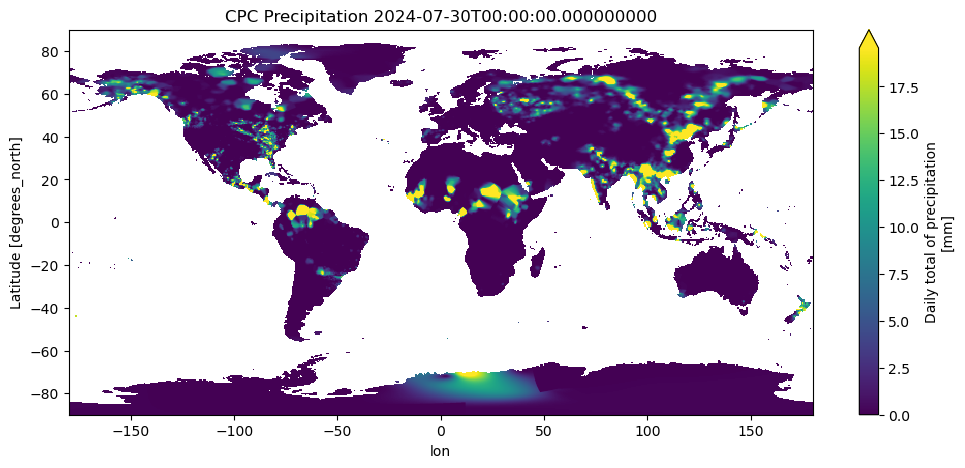

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
precip_sel.plot(
    ax=ax,
    x="lon", y="lat",
    cmap="viridis",
    robust=True,   # avoids extreme outliers messing up colors
)
ax.set_title(f"CPC Precipitation {precip_sel.time.values}")
plt.show()

# # Interactive plot
# precip_sel.hvplot.image(
#     x="lon",
#     y="lat",
#     cmap="viridis",
#     width=600,
#     height=400,
#     interactive=True
# )

In [16]:
precip_sel

<xarray.DataArray 'precip' (lat: 360, lon: 720)> Size: 1MB
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
    time     datetime64[ns] 8B 2024-07-30
  * lon      (lon) float32 3kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    statistic:     Total
    parent_stat:   Other
    long_name:     Daily total of precipitation
    cell_methods:  time: sum
    valid_range:   [   0. 1000.]
    avg_period:    0000-00-01 00:00:00
    actual_range:  [  0.   776.75]
    dataset:       CPC Global Precipitation
    _ChunkSizes:   [  1 360 720]

In [17]:
path_shapefiles = Path('../MSWEP/shapefiles')
shp_file = path_shapefiles / 'paso_de_la_compania.zip'  # example

# Load with geopandas
gdf = gpd.read_file(shp_file)

In [18]:
gdf.bounds

,minx,miny,maxx,maxy
0,-55.510417,-31.64625,-55.064583,-31.25875


In [23]:
# Give the DataArray a CRS
precip_sel.rio.write_crs("EPSG:4326", inplace=True)

# Tell rioxarray which dims are spatial
precip_sel = precip_sel.rio.set_spatial_dims(x_dim="lon", y_dim="lat")

# Merge geometry (in case shapefile has multiple polygons)
geometry = gdf.union_all().buffer(0.1)

# Clip
precip_clipped = precip_sel.rio.clip([geometry], precip_sel.rio.crs, drop=True)

In [24]:
geometry.bounds

(-55.61041665586019,
 -31.746232888909752,
 -54.96459736885474,
 -31.158848774236724)

In [25]:
precip_clipped

<xarray.DataArray 'precip' (lat: 1, lon: 1)> Size: 4B
array([[0.08398942]], dtype=float32)
Coordinates:
  * lat          (lat) float32 4B -31.25
    time         datetime64[ns] 8B 2024-07-30
  * lon          (lon) float32 4B -55.25
    spatial_ref  int64 8B 0
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    statistic:     Total
    parent_stat:   Other
    long_name:     Daily total of precipitation
    cell_methods:  time: sum
    valid_range:   [   0. 1000.]
    avg_period:    0000-00-01 00:00:00
    actual_range:  [  0.   776.75]
    dataset:       CPC Global Precipitation
    _ChunkSizes:   [  1 360 720]

In [27]:
# hay algunos en los que no puedo plotear porque solo tienen 1 valor

# precip_clipped.plot(cmap="viridis", robust=True)
# plt.title(f"CPC Precipitation {precip_clipped.time.values} - Paso de las Piedras")
# plt.show()

# Downloading data

In [2]:
# Paths
path_shapefiles = Path('../MSWEP/shapefiles')
shp_file = path_shapefiles / 'paso_de_las_piedras.zip'

# Load shapefile
gdf = gpd.read_file(shp_file)
geometry = gdf.union_all() #.buffer(0.25)  # optional buffer

# Function to open CPC data for a given year
def open_cpc_year(year):
    url = f"https://psl.noaa.gov/thredds/dodsC/Datasets/cpc_global_precip/precip.{year}.nc"
    ds = xr.open_dataset(url)
    precip = ds["precip"]  # select the precipitation variable first
    # Correct longitudes
    precip = precip.assign_coords(lon=(((precip.lon + 180) % 360) - 180)).sortby("lon")
    # Set CRS for spatial operations
    precip.rio.write_crs("EPSG:4326", inplace=True)
    precip = precip.rio.set_spatial_dims(x_dim="lon", y_dim="lat")
    # Clip to basin
    precip_clipped = precip.rio.clip([geometry], precip.rio.crs, drop=True)
    return precip_clipped

# Loop over all years and concatenate
all_years = []
for year in range(1989, 2020):  # 1989–2019 inclusive
    print(f"Processing year {year}...")
    precip_clipped = open_cpc_year(year)
    # Take spatial average over basin
    ts_year = precip_clipped.mean(dim=["lat", "lon"]).to_series()
    all_years.append(ts_year)

# Concatenate all years into one Series
precip_timeseries = pd.concat(all_years)
precip_timeseries.name = "precipitation"

# Save to CSV
precip_timeseries.to_csv("paso_de_las_piedras_precip_1989_2019.csv", header=True)

print("CSV saved: paso_de_las_piedras_precip_1989_2019.csv")

Processing year 1989...
Processing year 1990...
Processing year 1991...
Processing year 1992...
Processing year 1993...
Processing year 1994...
Processing year 1995...
Processing year 1996...
Processing year 1997...
Processing year 1998...
Processing year 1999...
Processing year 2000...
Processing year 2001...
Processing year 2002...
Processing year 2003...
Processing year 2004...
Processing year 2005...
Processing year 2006...
Processing year 2007...
Processing year 2008...
Processing year 2009...
Processing year 2010...
Processing year 2011...
Processing year 2012...
Processing year 2013...
Processing year 2014...
Processing year 2015...
Processing year 2016...
Processing year 2017...
Processing year 2018...
Processing year 2019...
CSV saved: paso_de_las_piedras_precip_1989_2019.csv


In [3]:
paso_de_las_piedras = pd.read_csv("./paso_de_las_piedras_precip_1989_2019.csv")
paso_de_las_piedras.head()

,time,precipitation
0,1989-01-01,0.0
1,1989-01-02,0.0
2,1989-01-03,0.0
3,1989-01-04,0.0
4,1989-01-05,0.0


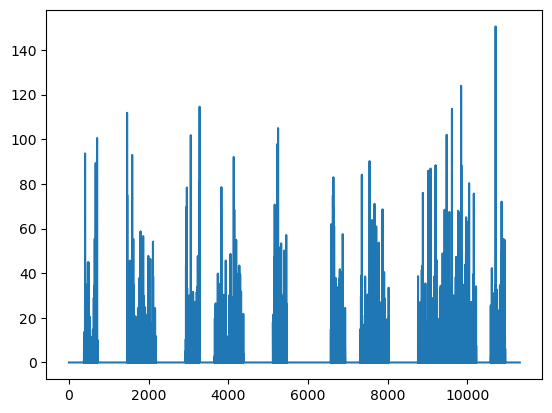

In [5]:
plt.plot(paso_de_las_piedras.precipitation)

In [27]:
import xarray as xr
import geopandas as gpd
import pandas as pd
from pathlib import Path
import os
import rioxarray
from rioxarray.exceptions import NoDataInBounds

# ======================
# Paths
# ======================

path_shapefiles = Path('../MSWEP/shapefiles')
output_dir = Path('./precip_timeseries')
output_dir.mkdir(exist_ok=True)

years = range(1989, 2020)  # 1989–2019 inclusive

# ======================
# Basin mapping
# ======================

basins_mapping = {
    'paso_mazangano': 'CAMELS_UY_10',
    'picada_de_coelho': 'CAMELS_UY_7',
    'sarandi_del_yi': 'CAMELS_UY_12',
    'paso_de_las_toscas': 'CAMELS_UY_8',
    'paso_de_las_piedras_rn': 'CAMELS_UY_15',
    'paso_del_borracho': 'CAMELS_UY_6',
    'bequelo': 'CAMELS_UY_16',
    'paso_de_las_piedras': 'CAMELS_UY_2',
    'paso_baltasar': 'CAMELS_UY_5',
    'fraile_muerto': 'CAMELS_UY_11',
    'paso_de_los_mellizos': 'CAMELS_UY_14',
    'paso_manuel_diaz': 'CAMELS_UY_3',
    'paso_aguiar': 'CAMELS_UY_9',
    'paso_de_la_compania': 'CAMELS_UY_1',
    'tacuarembo': 'CAMELS_UY_4',
    'durazno': 'CAMELS_UY_13'
}

# list shapefiles
shapefiles = [f for f in os.listdir(path_shapefiles) if f.endswith('.zip')]

# ======================
# Function to open CPC year
# ======================

def open_cpc_year(year):

    url = f"https://psl.noaa.gov/thredds/dodsC/Datasets/cpc_global_precip/precip.{year}.nc"

    ds = xr.open_dataset(url)

    precip = ds["precip"]

    # Fix longitude convention
    precip = precip.assign_coords(
        lon=(((precip.lon + 180) % 360) - 180)
    ).sortby("lon")

    # spatial setup
    precip = precip.rio.write_crs("EPSG:4326")
    precip = precip.rio.set_spatial_dims(x_dim="lon", y_dim="lat")

    return precip


# ======================
# Robust clip with progressive buffering
# ======================

def clip_with_buffer(precip, geometry, buffer_step=0.1, max_buffer=1.0):

    buffer = 0.0

    while buffer <= max_buffer:

        try:

            if buffer == 0:
                geom_try = geometry
            else:
                print(f"    Trying buffer = {buffer}")
                geom_try = geometry.buffer(buffer)

            clipped = precip.rio.clip(
                [geom_try],
                precip.rio.crs,
                drop=True
            )

            return clipped

        except NoDataInBounds:
            buffer += buffer_step

    raise RuntimeError("No data found even after buffering.")


# ======================
# Iterate over basins
# ======================

for shp_file in shapefiles[6:]:

    basin_name = shp_file.replace('.zip', '')

    if basin_name not in basins_mapping:
        print(f"Skipping {basin_name} (no mapping)")
        continue

    camels_id = basins_mapping[basin_name]

    print(f"\nProcessing {basin_name} -> {camels_id}")

    # load geometry
    gdf = gpd.read_file(path_shapefiles / shp_file).to_crs("EPSG:4326")
    geometry = gdf.union_all()

    all_years = []

    # iterate over CPC years
    for year in years:

        print(f"  Year {year}")

        precip = open_cpc_year(year)

        try:
            # clip basin with progressive buffer
            precip_clipped = clip_with_buffer(precip, geometry)

            # spatial average
            ts_year = precip_clipped.mean(dim=["lat", "lon"]).to_series()

            all_years.append(ts_year)

        except RuntimeError as e:
            print(f"    WARNING: {e} (skipping year)")
            continue

        finally:
            precip.close()

    # concatenate
    precip_timeseries = pd.concat(all_years)
    precip_timeseries.name = "precipitation"

    # save
    output_file = output_dir / f"{camels_id}_precip.csv"
    precip_timeseries.to_csv(output_file, header=True)

    print(f"Saved {output_file}")



Processing bequelo -> CAMELS_UY_16
  Year 1989
    Trying buffer = 0.1
  Year 1990
    Trying buffer = 0.1
  Year 1991
    Trying buffer = 0.1
  Year 1992
    Trying buffer = 0.1
  Year 1993
    Trying buffer = 0.1
  Year 1994
    Trying buffer = 0.1
  Year 1995
    Trying buffer = 0.1
  Year 1996
    Trying buffer = 0.1
  Year 1997
    Trying buffer = 0.1
  Year 1998
    Trying buffer = 0.1
  Year 1999
    Trying buffer = 0.1
  Year 2000
    Trying buffer = 0.1
  Year 2001
    Trying buffer = 0.1
  Year 2002
    Trying buffer = 0.1
  Year 2003
    Trying buffer = 0.1
  Year 2004
    Trying buffer = 0.1
  Year 2005
    Trying buffer = 0.1
  Year 2006
    Trying buffer = 0.1
  Year 2007
    Trying buffer = 0.1
  Year 2008
    Trying buffer = 0.1
  Year 2009
    Trying buffer = 0.1
  Year 2010
    Trying buffer = 0.1
  Year 2011
    Trying buffer = 0.1
  Year 2012
    Trying buffer = 0.1
  Year 2013
    Trying buffer = 0.1
  Year 2014
    Trying buffer = 0.1
  Year 2015
    Trying buffe